In [22]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np








# Load Data

In [ ]:
# Load Data
data = pd.read_csv('data/tennis_stats.csv')

# 1. Data Overview

In [ ]:
print(data.columns)



In [ ]:
print(data.info())

In [ ]:
print(data.describe())

# 2. Visualization

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])  # This ensures we only include numeric columns

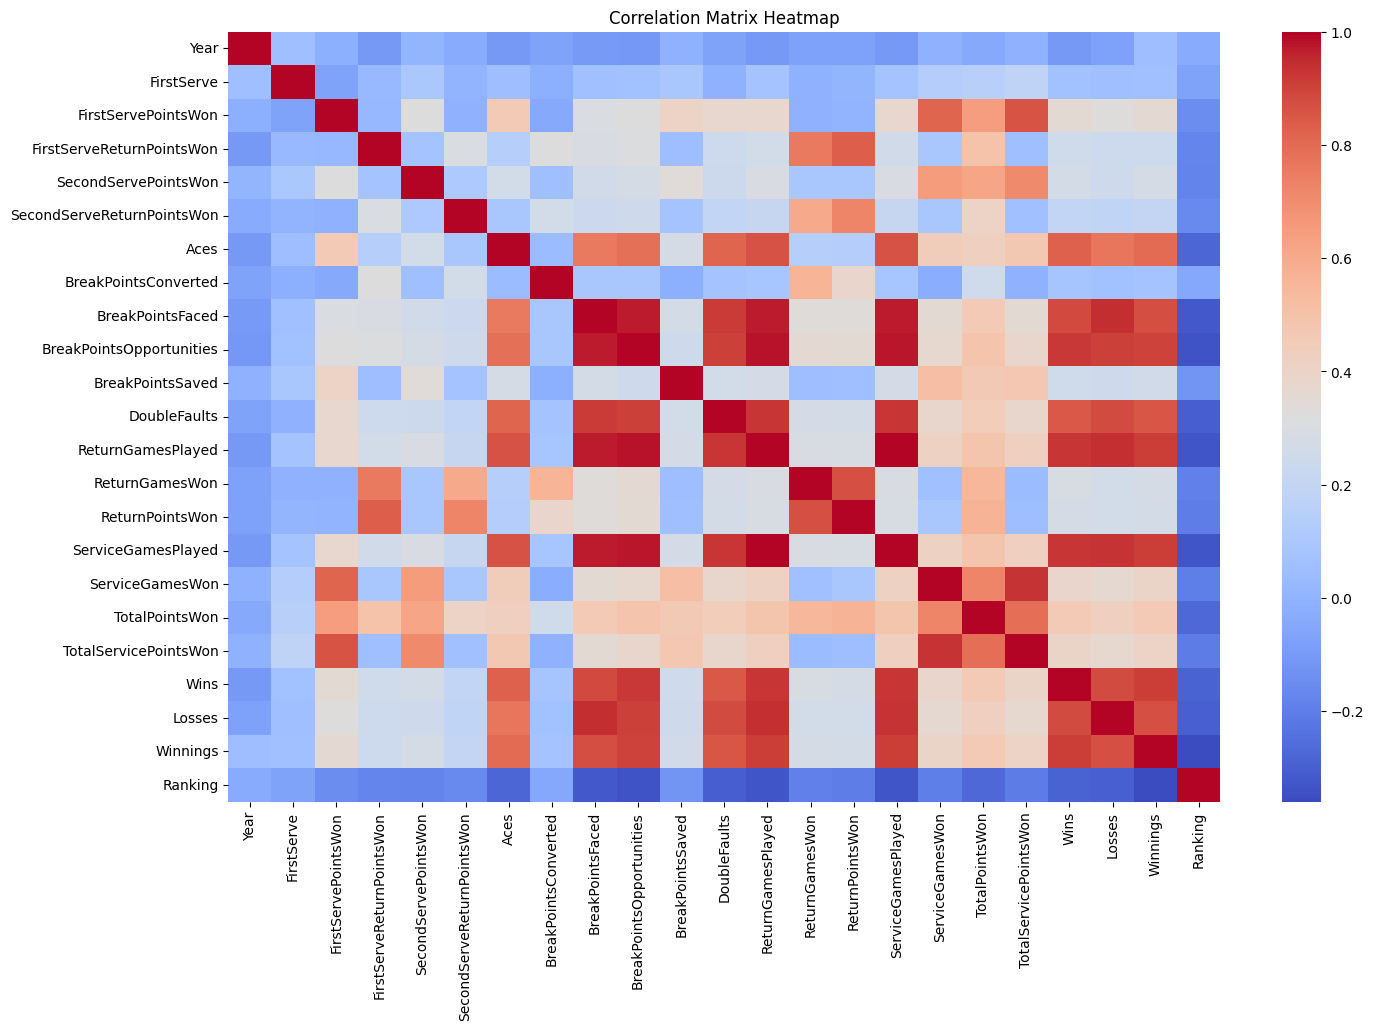

In [32]:
# Correlation Matrix Heatmap ( To see how different performance metrics relate to each other.)
plt.figure(figsize=(16, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


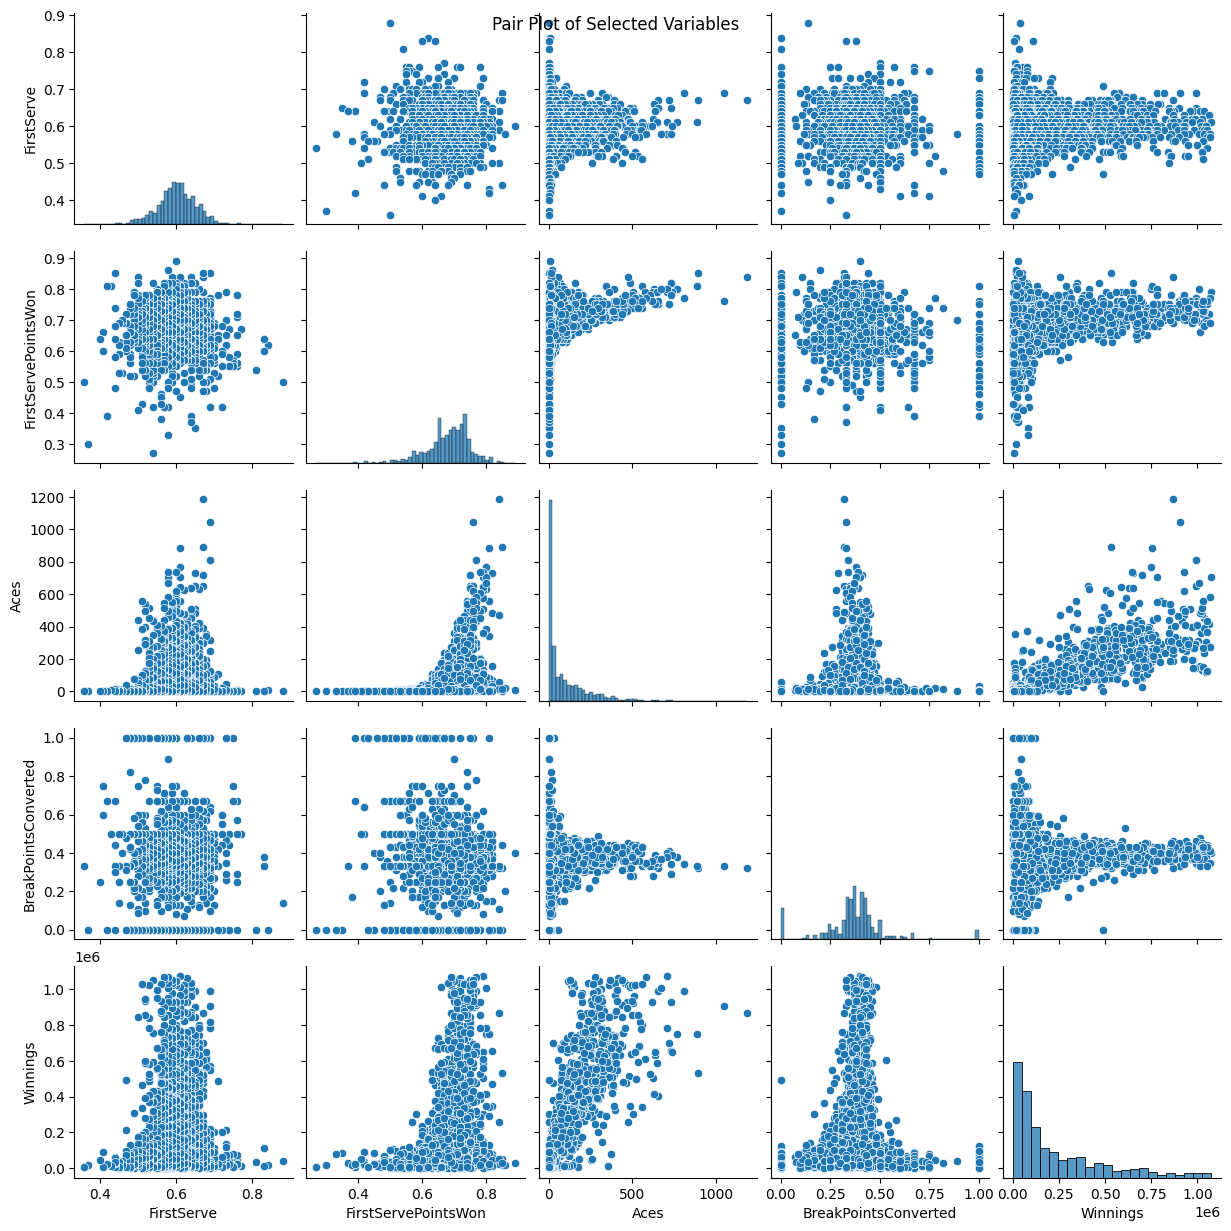

In [20]:
# Pair Plot for a subset of interesting variables (For selected key statistics to visualize pairwise relationships.)
sns.pairplot(data[['FirstServe', 'FirstServePointsWon', 'Aces', 'BreakPointsConverted', 'Winnings']])
plt.suptitle('Pair Plot of Selected Variables')
plt.show()

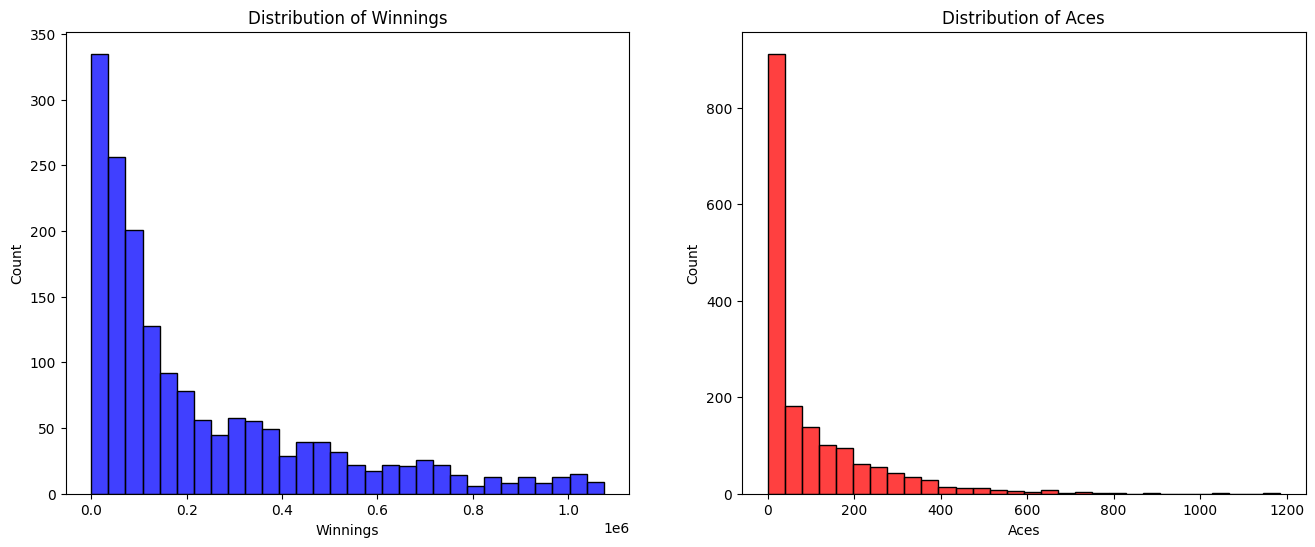

In [25]:
# Histograms of Winnings and Aces (To view distributions of individual statistics)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data['Winnings'], bins=30, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Winnings')
sns.histplot(data['Aces'], bins=30, ax=ax[1], color='red')
ax[1].set_title('Distribution of Aces')
plt.show()

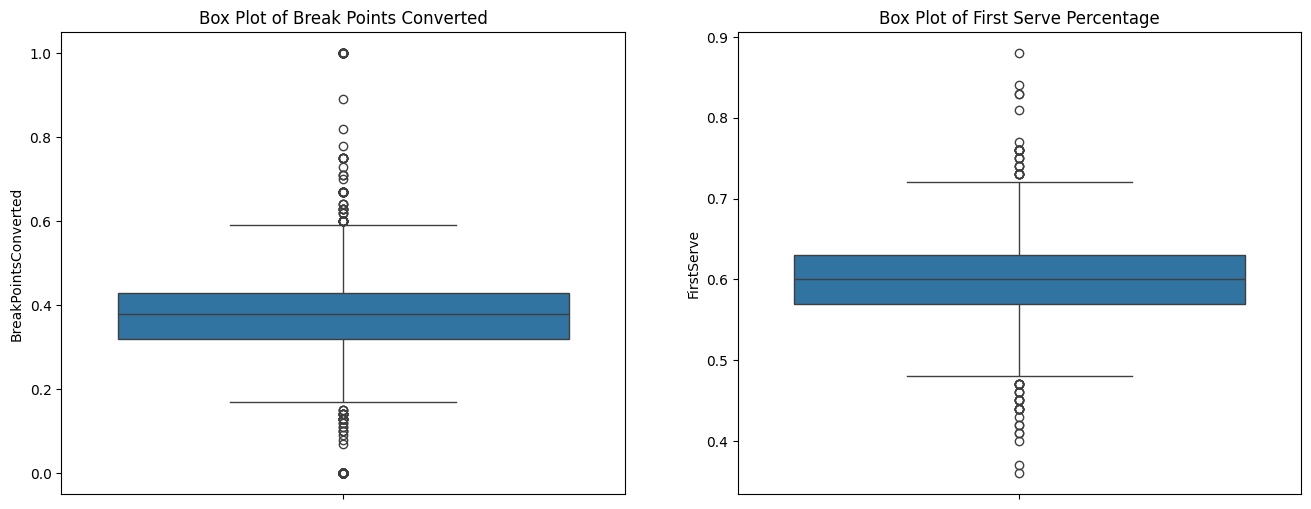

In [26]:
# Box Plot for BreakPointsConverted and FirstServe ( To look for outliers in metrics )
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(y=data['BreakPointsConverted'], ax=ax[0])
ax[0].set_title('Box Plot of Break Points Converted')
sns.boxplot(y=data['FirstServe'], ax=ax[1])
ax[1].set_title('Box Plot of First Serve Percentage')
plt.show()

## We found a strong relationship between the BreakPointsOpportunities feature and the Winnings outcome.



In [40]:
features = data[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = data[['Winnings']]

In [41]:
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [42]:
model = LinearRegression()
model.fit(features_train,outcome_train)

LinearRegression()

In [43]:
model.score(features_test,outcome_test)

0.8371215459288681

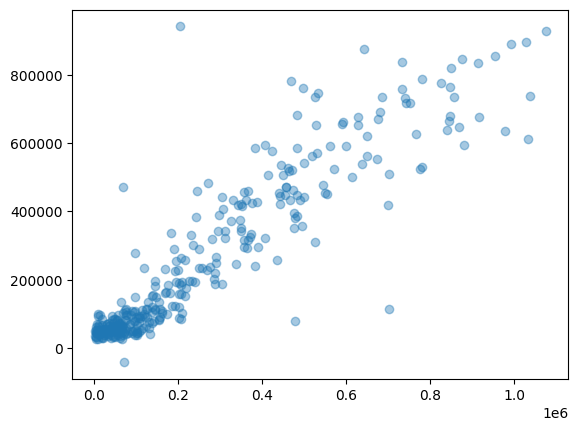

In [44]:
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)